In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import (sent_tokenize, word_tokenize, TreebankWordTokenizer, wordpunct_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import re
def clean_html(text):
  clean=re.compile("<.*?>")
  return re.sub(clean," ",text)
df['review']=df['review'].apply(clean_html)

In [ ]:
def remove_special(text):
    x=''

    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x = x + ' '

    return x

df['review']=df['review'].apply(remove_special)

def low(text):
  new=text.lower()
  return new
df['review']=df['review'].apply(low)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('not')
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


In [ ]:

nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemm(text):
  y=[]
  text=text.split()
  for i in text:
    y.append(lemmatizer.lemmatize(i))
  return y
df['review']=df['review'].apply(lemm)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, think, ...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['review']=df['review'].apply(str)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],
                                                    df['sentiment'],
                                                    random_state=42)

In [ ]:
tfidf=TfidfVectorizer(min_df=10)
train_tfidf=tfidf.fit_transform(X_train)
test_tfidf=tfidf.transform(X_test)
print(tfidf.vocabulary_)
print("n_samples(train): %d, n_features: %d" % train_tfidf.shape)
print("n_samples(test): %d, n_features: %d" % test_tfidf.shape)

{'figure': 6858, 'alternate': 777, 'reality': 14466, 'teen': 17848, 'flick': 7016, 'precisely': 13748, 'ferris': 6806, 'bueller': 2528, 'type': 18618, 'character': 3067, 'leader': 10352, 'cheat': 3123, 'ring': 15142, 'yeah': 19996, 'know': 10122, 'not': 12323, 'meant': 11318, 'compared': 3670, 'least': 10372, 'orange': 12627, 'way': 19555, 'none': 12285, 'le': 10347, 'bottom': 2272, 'line': 10565, 'galaxy': 7447, 'away': 1460, 'even': 6323, 'minor': 11583, 'classic': 3351, 'watchable': 19527, 'though': 18050, 'expecting': 6469, 'much': 11896, 'said': 15449, 'main': 10952, 'charm': 3092, 'premise': 13790, 'wear': 19572, 'thin': 18023, 'writing': 19940, 'clever': 3395, 'movie': 11883, 'deliver': 4773, 'enough': 6126, 'laugh': 10305, 'twist': 18602, 'tension': 17909, 'keep': 9988, 'interest': 9448, 'honest': 8670, 'continue': 3965, 'watching': 19531, 'hope': 8699, 'see': 15790, 'anything': 1022, 'suddenly': 17398, 'clicked': 3404, 'stylish': 17313, 'recommend': 14540, 'btw': 2509, 'seems'

In [ ]:
from sklearn.metrics import accuracy_score
param_grid = {'C': [0.1, 1, 10]}
clf = LinearSVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_tfidf, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(test_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.896


In [ ]:
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {'C': [0.1, 1, 10]}
# clf = LinearSVC()
# random_search = RandomizedSearchCV(clf, param_distributions=param_grid,
#     n_iter=3, cv=15)
# random_search.fit(train_tfidf, y_train)
# clf =random_search.best_estimator_
# y_pred = clf.predict(test_tfidf)
# print('Test Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
def classify_sentiment(text):
    tokens = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    text_vectorized = tfidf.transform([' '.join(words)])
    prediction = clf.predict(text_vectorized)
    return prediction

In [ ]:
text1 = """essence of the beloved animated series it's based on. From the wooden
 performances to the clumsy dialogue, it's clear that this film missed the mark.
The biggest flaw in "The Last Airbender" is its lackluster storytelling. The
plot feels rushed and disjointed, failing to establish a clear narrative arc or
 properly develop its characters. The special effects, which should have been a
 highlight of the movie, are also underwhelming and often distractingly bad."""
print(classify_sentiment(text1))

['negative']


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      6157
    positive       0.89      0.91      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



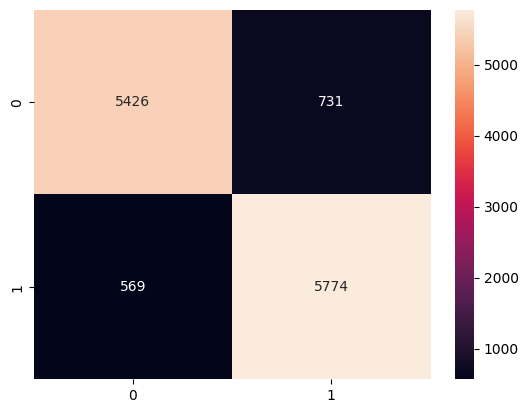

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');